In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({"font.size":15})
plt.style.use("dark_background")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [103]:
df=pd.read_csv("admission.csv")

In [104]:
df.shape

(500, 9)

In [105]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [106]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [107]:
df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
199,200,313,107,3,4.0,4.5,8.69,0,0.72
220,221,313,103,3,4.0,4.0,8.75,0,0.76
272,273,294,95,1,1.5,1.5,7.64,0,0.49
418,419,309,111,2,2.5,4.0,8.03,0,0.60
355,356,317,106,2,2.0,3.5,8.12,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84
67,68,316,107,2,3.5,3.5,8.64,1,0.57
143,144,340,120,4,4.5,4.0,9.92,1,0.97
399,400,333,117,4,5.0,4.0,9.66,1,0.95
383,384,300,100,3,3.0,3.5,8.26,0,0.62


In [108]:
df.drop(["Serial No."],axis=1, inplace=True)

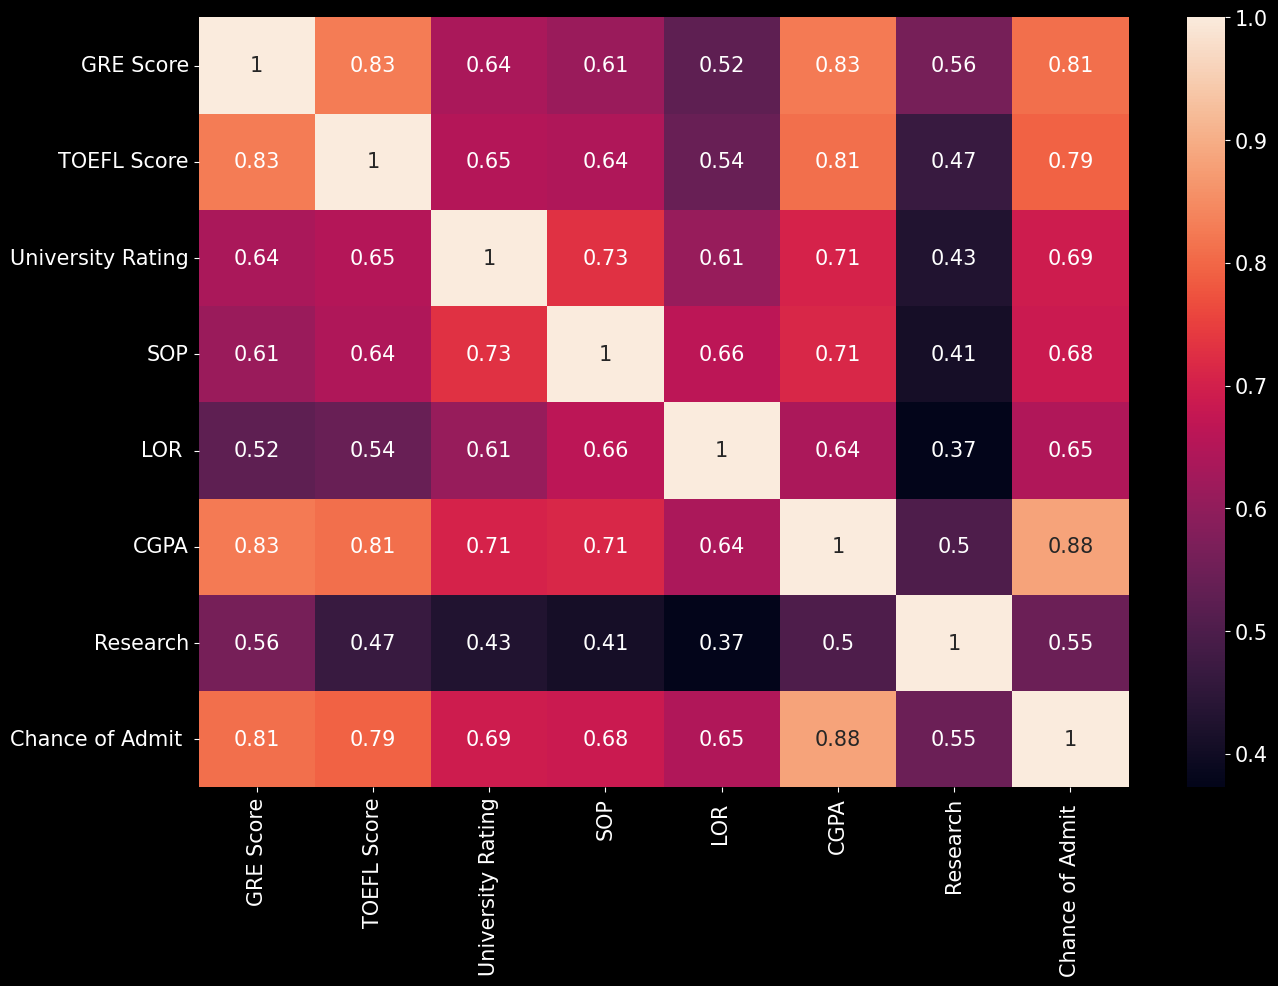

In [109]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

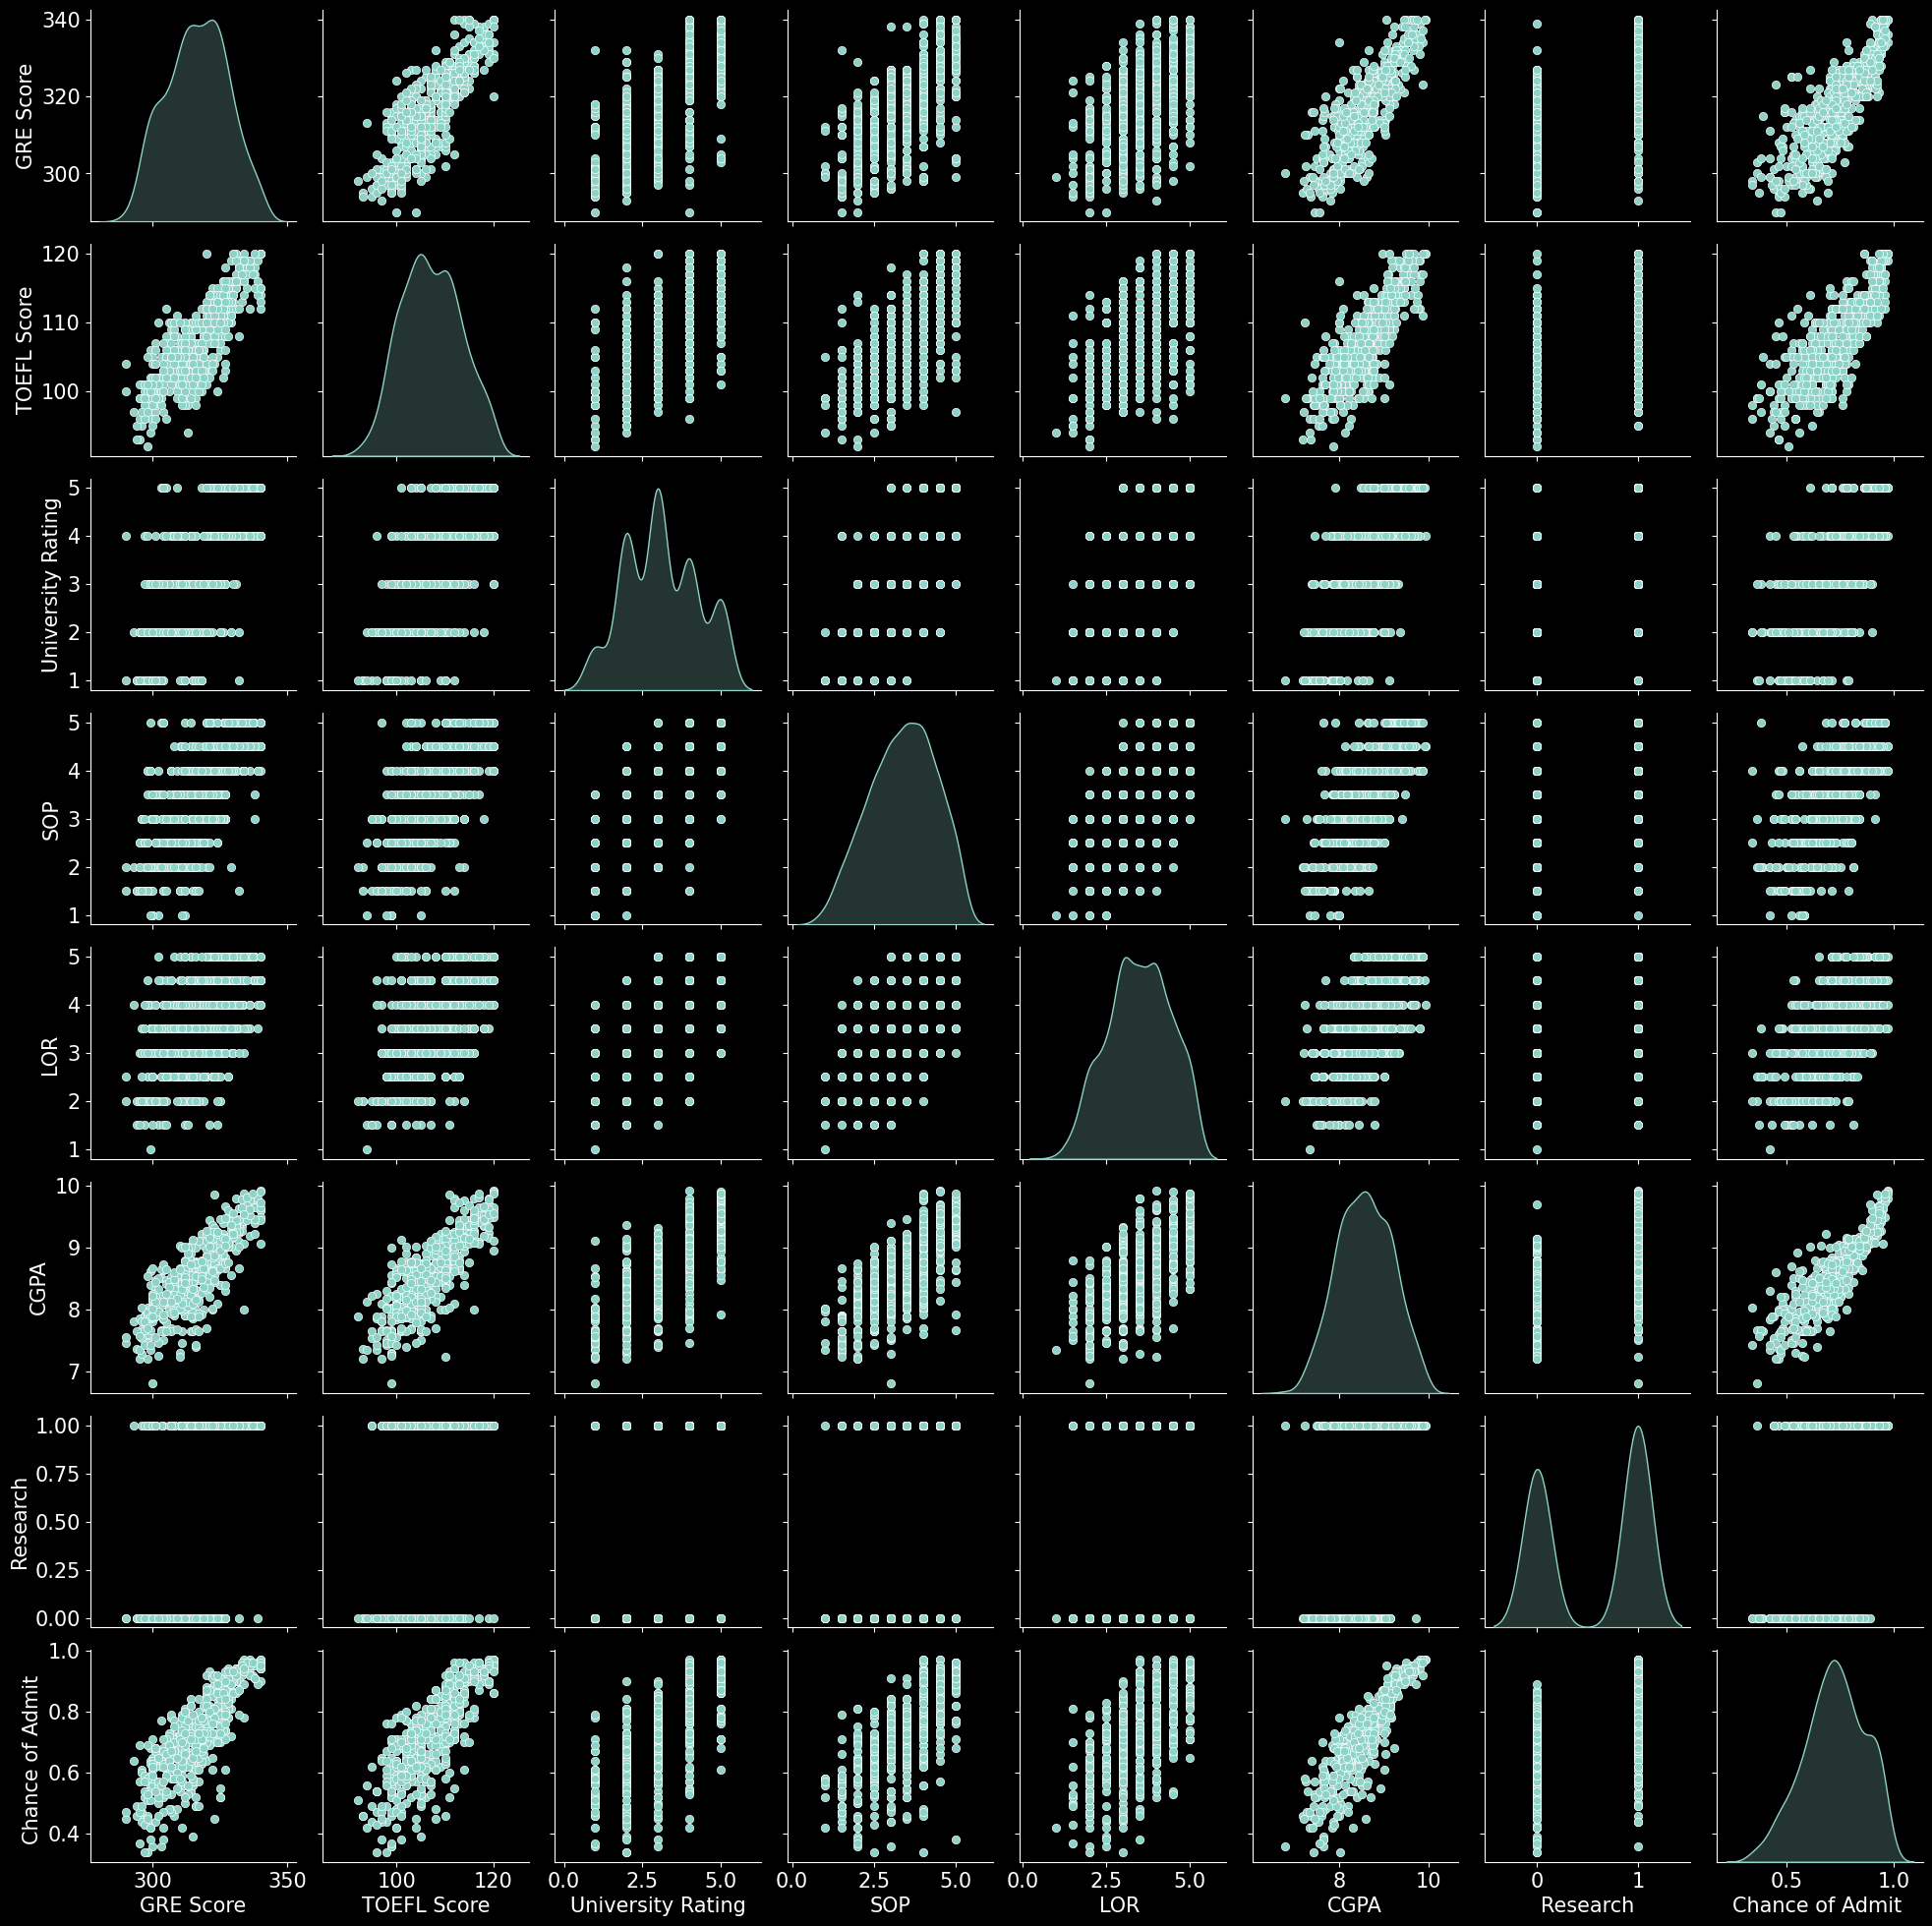

In [110]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

### Q.2 Find out the minimum and maximum values for GRE score


In [111]:
df["GRE Score"].min()

290

In [112]:
df["GRE Score"].max()

340

### Q.3 Find out the percentage of universities for each university rating

In [113]:
rating=df["University Rating"].value_counts()

In [114]:
Length=df["University Rating"].count()

In [115]:
Percentage= rating/Length*100

In [116]:
print(Percentage)

3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: University Rating, dtype: float64


### Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :
<br>Students having the “Chance of Admit” value &gt; 0.80, are assigned value 1, and
<br>Students having the “Chance of Admit” value &lt; 0.80, are assigned value 0
<br>Where 0: Low chance of Admission and 1: High chance of admission

In [117]:
df["Admission Decision"]= np.where(df['Chance of Admit ']>0.80,1,0)
df.drop("Chance of Admit ", axis=1, inplace=True)

In [118]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Decision
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


### Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [120]:
x=df.drop(columns="Admission Decision", axis=1)
y=df["Admission Decision"]

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [143]:
DTM=DecisionTreeClassifier(max_depth=4)
DTM.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [144]:
DTM.score(x_train,y_train)

0.9514285714285714

In [145]:
DTM.score(x_test,y_test)

0.94

Conclusion: The decision tree classifier is demonstrating strong predictive power, achieving a high accuracy both on the training and test sets.The model is not overfitting, as evidenced by the high test score close to the training score.
The hyperparameter tuning process seems to have been successful, as it has helped improve the model's performance on the test set while avoiding overfitting.